# Introduction
In the world of football, strikers play a pivotal role in deciding the fate of matches and championships. Identifying the best strikers among a pool of talent involves a comprehensive analysis of various factors ranging from performance metrics to personal attributes. In this project, titled "Segmenting and Classifying the Best Strikers," we delve into a dataset containing information on 500 strikers, aiming to uncover patterns, insights, and classifications that distinguish top-performing strikers from the rest.

# Project Description
The project involves utilizing data analytics techniques to explore and understand the characteristics and performance metrics of strikers. By employing descriptive statistics, data visualization, feature engineering, and machine learning algorithms, we aim to identify the key attributes that contribute to a striker's success on the field and classify them into different categories based on their performance.

## Purpose
The primary purpose of this project is to provide a systematic framework for analyzing and categorizing strikers based on their performance metrics and personal attributes. By doing so, coaches, scouts, and football analysts can gain valuable insights into the characteristics of top-performing strikers and make informed decisions in team selection, recruitment, and strategic planning.


# Dataset Description
The dataset comprises various variables related to 500 strikers, encompassing both demographic information and performance metrics. Key variables include nationality, footedness, marital status, goals scored, assists, shot accuracy, dribbling success, and many more, providing a comprehensive overview of each striker's profile and on-field performance.

-> Striker ID: Unique identifiers assigned to each striker.

-> Nationality: The country of origin for each striker.

-> Footedness: Indicates whether the striker is right or left-footed.

-> Marital Status: Indicates whether the striker is married (yes) or unmarried (no).

-> Goals Scored: The total number of goals scored by the striker, a fundamental performance metric.

-> Assists: The number of assists provided by the striker, indicating their ability to create goal-scoring opportunities for teammates.

-> Shots on Target: The number of shots taken by the striker that hit the target, reflecting their ability to create scoring opportunities and test the goalkeeper.

-> Shot Accuracy: The percentage of shots on target out of total shots taken, showing the striker's precision and effectiveness.

-> Conversion Rate: The percentage of shots that result in goals, revealing the striker's efficiency in front of goal.

-> Dribbling Success: A metric indicating the striker's ability to bypass defenders and create goal-scoring opportunities through individual skill.

-> Movement off the Ball: Reflects how actively the striker moves to find space and create opportunities for themselves and teammates.

-> Hold-up Play: Measures the striker's ability to retain possession and bring teammates into play with passes or layoffs.

-> Aerial Duels Won: The number of aerial duels won by the striker, important for strikers strong in the air as it can create scoring chances.

-> Defensive Contribution: Reflects the striker's defensive efforts such as tracking back, pressing opponents, and making interceptions.

-> Big Game Performance: Indicates the striker's performance in important matches, which can elevate their reputation.

-> Consistency: Reflects how regularly the striker performs at a high level over the course of a season or multiple seasons.

-> Versatility: Measures the striker's ability to adapt to different tactical systems and roles within the team.

-> Penalty Success Rate: The efficiency of the striker from the penalty spot, crucial in tight matches.

-> Impact on Team Performance: Reflects how the team's results and overall attacking play are influenced by the striker's presence.

-> Off-field Conduct: Measures the striker's professionalism, leadership, and behavior, which can impact their overall performance and value to the team.

# Conclusion
Through a comprehensive analysis of the dataset, we've gained valuable insights into the characteristics and performance metrics of strikers. By segmenting and classifying the strikers based on their attributes and performance, we've provided a framework for identifying top-performing strikers and predicting their performance type. This project serves as a valuable resource for football professionals and enthusiasts alike, aiding in talent identification, team selection, and strategic planning.

Questions for this assignment
What is the maximum goal scored by an individual striker?

What is the portion of Right-footed strikers within the dataset?

Which nationality strikers have the highest average number of goals scored?

What is the average conversion rate for left-footed player?

How many left footed players are from France?

What is the correlation co-efficient between hold up play and consistency score?

What is the p-value for the shapiro wilk test of consistency score? Is it normally distributed?

What is the p-value for the levene's test of ANOVA analysis? Is the heteroscedasticity assumed?

Is there any significant correlation between strikers' Hold-up play and consistency rate?

Describe the beta value of Hold-up Play you have found in your regression analysis.

What is the average Total contribution score you get for the best strikers?

What is the accuracy score of your LGR model? How many regular strikers your model predicted correctly? How many best strikers your model predicted incorrectly?

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import stats, shapiro, levene, pearsonr,f_oneway

### Load Dataset

In [2]:
# Load dataset and print first 5 rows to validate dataset.
data = pd.read_excel('Strikers_performance.xlsx')
data

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,England,Left-footed,Yes,17.694550,7.156699,39.042650,0.707015,0.240660,0.707748,89.351540,60.284576,28.386885,39.510350,4.448635,0.767147,0.770213,5.999478,12.419711
496,497,Germany,Right-footed,Yes,9.813769,13.393060,39.430525,0.597348,0.186052,0.725775,78.155010,39.221882,15.974141,47.114106,6.742907,0.865265,0.876903,5.967767,8.653989
497,498,England,Left-footed,Yes,14.048307,9.922529,33.458564,0.511813,0.186012,0.575824,69.519115,56.797022,25.384241,71.129102,5.696650,0.628260,0.747261,11.249112,6.329751
498,499,England,Right-footed,Yes,10.621909,6.286463,32.168438,0.583693,0.239519,0.733418,68.168495,76.433782,9.151613,48.080362,2.611235,0.796795,0.799489,1.452370,11.305826


### Check for missing values

In [3]:
# First thing I do is check for missing values and which shows I found 3 Missing Value columns. 
missing_values = data.isnull().sum()
print("Missing Values: \n", missing_values)

Missing Values: 
 Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


#### Missing Values are: 
Movement off the Ball         "6" | 
Big Game Performance          "2" | 
Penalty Success Rate          "5" | 

In [4]:
# Simple Imputer to impute missing values using median values for numeric columns. This will help us in removing outliers which may skew obersvations later on.
imputer = SimpleImputer(strategy = 'median')
imputer.fit(data[["Movement off the Ball", "Big Game Performance", "Penalty Success Rate"]])
data[["Movement off the Ball", "Big Game Performance", "Penalty Success Rate"]] = imputer.transform(data[["Movement off the Ball", "Big Game Performance", "Penalty Success Rate"]])
missing_values = data.isnull().sum()
print("Missing Values: \n", missing_values)

Missing Values: 
 Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


### Ensuring correct data types for numeric cols: 

In [5]:
# When dealing with numeric data, a check I follow is to check is to convert the required fields to int data type. 
# This saves the time of checking the data types of each required field.
cols = ['Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball', 'Hold-up Play', 'Aerial Duels Won', 
        'Defensive Contribution', 'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct']
data[cols] = data[cols].astype(int)

### Perform descriptive analysis on the dataset. Round the output values by 2 decimal points.

In [6]:
# Describe gives a better understanding of the numeric data and also can show if any inconsistencies are present in the data.
data.describe().round(2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


### Data Visualization:
    
-> Perform percentage analysis on the variable Footedness and create a pie chart on the output using matplotlib.

-> Visualize the distribution of players' footedness across different nationalities in a countplot of seaborn.  

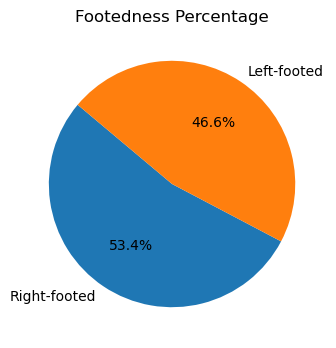

In [7]:
#Footedness Pie Chart shows the distribution of strickers as per their dominant footedness:
footedness_count = data['Footedness'].value_counts()
plt.figure(figsize = (7,4))
plt.pie(footedness_count, labels = footedness_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Footedness Percentage")
plt.show()

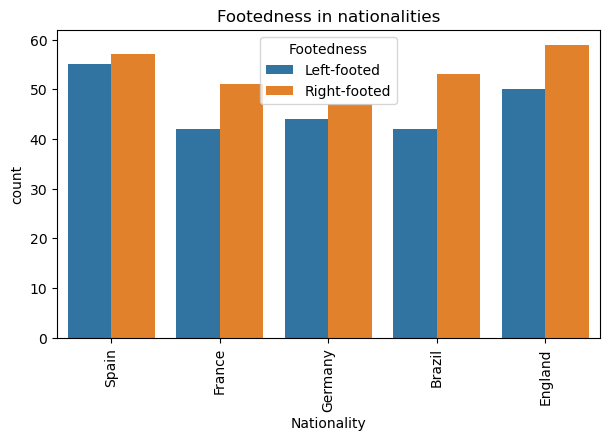

In [8]:
#Distribution of footedness vs nations shows which footedness is dominant but country wise
plt.figure(figsize = (7,4))
sns.countplot(data=data, x = "Nationality", hue = "Footedness")
plt.title("Footedness in nationalities")
plt.xticks(rotation = 90)
plt.show()

## Statistical Analysis:¶
-> Determine which nationality strikers have the highest average number of goals scored.

-> Calculate the average conversion rate for players based on their footedness.

-> Find whether there is any significant difference in consistency rates among strikers from various nationalities. Before doing the appropriate test, must check for the assumptions.

-> Check if there is any significant correlation between strikers' Hold-up play and consistency rate. Must check for the assumptions.

-> Check if strikers' hold-up play significantly influences their consistency rate. 

In [9]:
# Highest average number of goals scored by nationality
avg_goal = data.groupby("Nationality")["Goals Scored"].mean()
avg_goal

Nationality
Brazil     15.315789
England    13.899083
France     14.408602
Germany    14.351648
Spain      14.687500
Name: Goals Scored, dtype: float64

In [10]:
# Average conversion rate for players based on their footedness.
avg_conversion = data[data["Footedness"] == "Left-footed"]["Conversion Rate"].mean()
print("Left Footedness:",avg_conversion)

avg_conversion = data[data["Footedness"] == "Right-footed"]["Conversion Rate"].mean()
print("Right Footedness:",avg_conversion)

Left Footedness: 0.19808556002126498
Right Footedness: 0.20059234267216383


In [11]:
# Check for significant difference in consistency rates vs nationalities. Here I must use 2 tests: 
# 1. Shapiro-Wilks test for normality of consistency.
# 2. levene's test for homogeneity of variances.
# 3. Last is Anova to see the significant difference in consistency rates vs nationalities

In [12]:
# Shapiro-Wilks test for normality of consistency.
shapiro_test = shapiro(data["Consistency"])
print("P-value", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
    print("Consistency normally distributed")
else:
    print("Consistency is not normally distributed")

P-value 0.4512665271759033
Consistency normally distributed


In [13]:
# Levene's test.
levene_test = levene(*[data[data["Nationality"] == nation]["Consistency"] for nation in data["Nationality"].unique()])
print("P-value", levene_test.pvalue)
if levene_test.pvalue > 0.05:
    print("Homoscedasticity assumed.")
else:
    print("Heteroscedasticity assumed.")

P-value 0.8083990350934653
Homoscedasticity assumed.


In [14]:
# Anova for significant difference in consistency rates vs nationalities.
if shapiro_test.pvalue > 0.05 and levene_test.pvalue > 0.05:
    anova_test = f_oneway(*[data[data['Nationality'] == nation]['Consistency'] for nation in data['Nationality'].unique()])
    print("ANOVA test p-value:", anova_test.pvalue)
    if anova_test.pvalue < 0.05:
        print("Significant difference in consistency rates among nationalities.")
    else:
        print("No significant difference in consistency rates among nationalities.")
else:
        print("ANOVA assumptions not met. Consider using a non-parametric test.")

ANOVA test p-value: 0.19278675901599154
No significant difference in consistency rates among nationalities.


In [15]:
# For significant correlation between strikers' Hold-up play and consistency rate. Must check for the assumptions, 
# Pearson Correlation Test is used.
correlation, _ = pearsonr(data['Hold-up Play'], data['Consistency'])
print("Correlation coefficient between Hold-up Play and Consistency:", round(correlation, 2))

Correlation coefficient between Hold-up Play and Consistency: 0.15


In [16]:
# Correlation between Hold-up Play and Consistency
correlation, _ = pearsonr(data['Hold-up Play'], data['Consistency'])
print("Correlation coefficient between Hold-up Play and Consistency:", round(correlation, 2))

Correlation coefficient between Hold-up Play and Consistency: 0.15


In [17]:
# to Check if strikers' hold-up play significantly influences their consistency rate,
# I'll use Linear regression to predict the change is consistency for each variable change.

X = data[['Hold-up Play']]
y = data['Consistency']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)
r_value = r2_score(y, y_pred)

print(f"Coefficient for Hold-up Play: {model.coef_[0]}")

slope, intercept, r_value, p_value, std_err = stats.linregress(data['Hold-up Play'], data['Consistency'])
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Hold-up Play significantly influences Consistency.")
else:
    print("Hold-up Play does not significantly influence Consistency.")

Coefficient for Hold-up Play: 0.0014967578334912639
P-value: 0.0010146963053630626
Hold-up Play significantly influences Consistency.


C:\Users\aryashah51\AppData\Local\Temp\ipykernel_2336\3291954946.py:15: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  slope, intercept, r_value, p_value, std_err = stats.linregress(data['Hold-up Play'], data['Consistency'])


### The Co-efficienent and P value indicates a positive influence of Hold up Play on Consistency.

# Feature Engineering:
Create a new feature - Total contribution score by summing up specific columns: 'Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Consistency'.

Encode the Footedness and marital status by LabelEncoder.

Create dummy variables for Nationality and add them to the data.

In [18]:
# Creating a new feature called Total contribution score
data["Total contribution score"] = data['Goals Scored'] + data['Assists'] + data['Shots on Target'] + data['Dribbling Success'] + data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency']
data["Total contribution score"]

0      113.577376
1      110.600139
2       94.433410
3      124.250575
4      107.293123
          ...    
495    135.474895
496    130.591040
497    158.204084
498    108.530213
499    102.317446
Name: Total contribution score, Length: 500, dtype: float64

In [19]:
# Encoding Footedness, Marital Status using LabelEncoder to 0 and 1.
# This makes it easier to analyse data since these both are in numerical form now.
labelencoder = LabelEncoder()
data['Footedness'] = labelencoder.fit_transform(data['Footedness'])
data['Marital Status'] = labelencoder.fit_transform(data['Marital Status'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [20]:
# Creating dummy variables for Nationality
data = pd.get_dummies(data, columns=['Nationality'], drop_first=True)
data

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,6,0.820314,0.922727,8,11,113.577376,0,0,0,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,6,0.803321,0.678984,3,8,110.600139,0,1,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,3,0.766540,0.843858,8,9,94.433410,0,0,1,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,6,0.611798,0.662997,6,8,124.250575,0,1,0,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,8,0.701638,0.906538,8,6,107.293123,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,4,0.767147,0.770213,5,12,135.474895,1,0,0,0
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,6,0.865265,0.876903,5,8,130.591040,0,0,1,0
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,5,0.628260,0.747261,11,6,158.204084,1,0,0,0
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,2,0.796795,0.799489,1,11,108.530213,1,0,0,0


### Clustering Analysis:
Perform KMeans clustering:

Select features by dropping the Striker_ID from the updated data.

Calculate the Within-Cluster-Sum-of-Squares (WCSS).

Visualize the elbow chart to select the optimal number of clusters (The breakpoint of elbow chart must show 2).

Build the KMeans cluster with the optimal number of clusters and add the labels into the data.

Calculate the average total contribution score by the value of clusters.

Assign the tag 'Best strikers' for 0 and 'Regular strikers' for 1 and add a new column 'Strikers types' into the data. Drop the Clusters variable.

#### The point here is to classify the players into 2 Clusters: 0 and 1. Best for 0 and Regular for 1

In [23]:
# K Means cluster analysis:
# 1. drop stricker_id from the updated data: 
features = data.drop(columns = ["Striker_ID"])
features


,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,6,0.820314,0.922727,8,11,113.577376,0,0,0,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,6,0.803321,0.678984,3,8,110.600139,0,1,0,0
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,3,0.766540,0.843858,8,9,94.433410,0,0,1,0
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,6,0.611798,0.662997,6,8,124.250575,0,1,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,8,0.701638,0.906538,8,6,107.293123,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,17,7,39,0.707015,0.240660,0.707748,89,60,...,4,0.767147,0.770213,5,12,135.474895,1,0,0,0
496,1,1,9,13,39,0.597348,0.186052,0.725775,78,39,...,6,0.865265,0.876903,5,8,130.591040,0,0,1,0
497,0,1,14,9,33,0.511813,0.186012,0.575824,69,56,...,5,0.628260,0.747261,11,6,158.204084,1,0,0,0
498,1,1,10,6,32,0.583693,0.239519,0.733418,68,76,...,2,0.796795,0.799489,1,11,108.530213,1,0,0,0


In [25]:
#2. Calculate the Within-Cluster-Sum-of-Squares (WCSS).
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    

C:\Users\aryashah51\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aryashah51\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aryashah51\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aryashah51\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a m

In [26]:
wcss

[313032.5703676464,
 232124.4101493878,
 205397.1154738398,
 183137.2847145473,
 166662.74528541134,
 156444.41170652106,
 148492.54188417533,
 141709.80802146342,
 137421.4617697805,
 131103.7626063764]

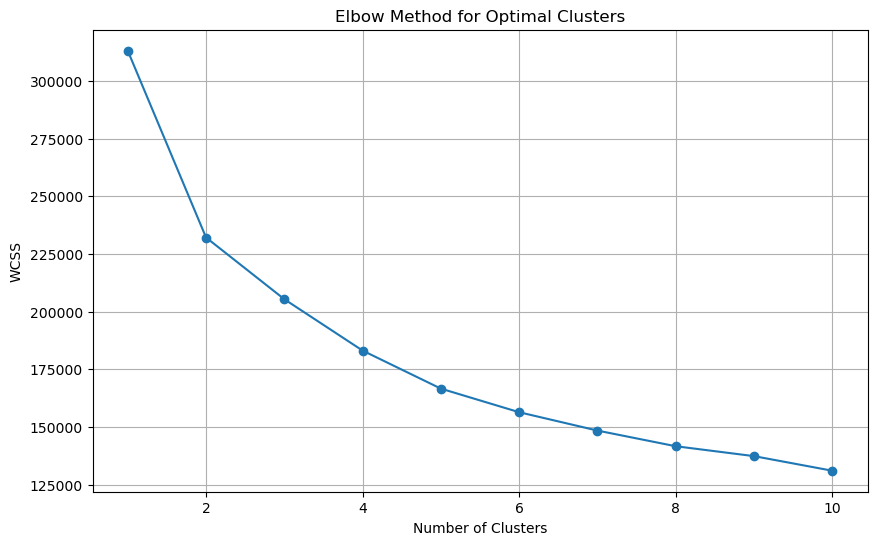

This chart is crucial for deciding how many clusters (n_clusters) to use in the KMeans algorithm, as it helps achieve effective segmentation of the data with minimal distortion.


In [32]:
#3. Visualize the elbow chart to select the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
print("This chart is crucial for deciding how many clusters (n_clusters) to use in the KMeans algorithm, as it helps achieve effective segmentation of the data with minimal distortion.")

In [28]:
#4. Build the KMeans cluster with the optimal number of clusters and add the labels into the data.
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

C:\Users\aryashah51\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
# look for the last column "Cluster"
features

,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,6,0.820314,0.922727,8,11,113.577376,0,0,0,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,6,0.803321,0.678984,3,8,110.600139,0,1,0,0
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,3,0.766540,0.843858,8,9,94.433410,0,0,1,0
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,6,0.611798,0.662997,6,8,124.250575,0,1,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,8,0.701638,0.906538,8,6,107.293123,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,17,7,39,0.707015,0.240660,0.707748,89,60,...,4,0.767147,0.770213,5,12,135.474895,1,0,0,0
496,1,1,9,13,39,0.597348,0.186052,0.725775,78,39,...,6,0.865265,0.876903,5,8,130.591040,0,0,1,0
497,0,1,14,9,33,0.511813,0.186012,0.575824,69,56,...,5,0.628260,0.747261,11,6,158.204084,1,0,0,0
498,1,1,10,6,32,0.583693,0.239519,0.733418,68,76,...,2,0.796795,0.799489,1,11,108.530213,1,0,0,0


In [48]:
#5 Calculate the average total contribution score by the value of clusters
avg_contribution_by_cluster = data.groupby('Cluster')['Total contribution score'].mean()
print("Average Total Contribution Score by:", avg_contribution_by_cluster)

Average Total Contribution Score by: Cluster
0    123.386539
1    101.898195
Name: Total contribution score, dtype: float64


In [51]:
#6 Assign the tag 'Best strikers' for 0 and 'Regular strikers' for 1
data['Strikers types'] = data['Cluster'].map({0: 'Best strikers', 1: 'Regular strikers'})
data = data.drop(columns = ["Cluster"]) 
data

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,0,0,0,1,Regular strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,0,1,0,0,Regular strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,0,0,1,0,Regular strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,0,1,0,0,Best strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,0,1,0,0,Regular strikers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,0.767147,0.770213,5,12,135.474895,1,0,0,0,Best strikers
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,0.865265,0.876903,5,8,130.591040,0,0,1,0,Best strikers
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,0.628260,0.747261,11,6,158.204084,1,0,0,0,Best strikers
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,0.796795,0.799489,1,11,108.530213,1,0,0,0,Best strikers


# Machine Learning Model:

Select the features into x and the target column Strikers types into y. Must delete unnecessary columns (i.e., 'Strikers_ID') while selecting the features.

Perform feature scaling with StandardScaler and split the data into train and test sets where the test data size will be 20%.

Build a logistic regression machine learning model to predict strikers type.

Make predictions and evaluate by calculating the accuracy percentage.

Create the confusion matrix and visualize it.

In [74]:
# Select the features into x and the target column Strikers types into y. 
# Must delete unnecessary columns (i.e., 'Strikers_ID') while selecting the features.
X = data.drop(columns=['Striker_ID', 'Strikers types'])
y = data['Strikers types']

In [75]:
# Perform feature scaling with StandardScaler and split the data into train and test sets 
# where the test data size will be 20%.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [76]:
# Build a logistic regression machine learning model to predict strikers type.
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [77]:
# Make predictions and evaluate by calculating the accuracy percentage.
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 97.00%


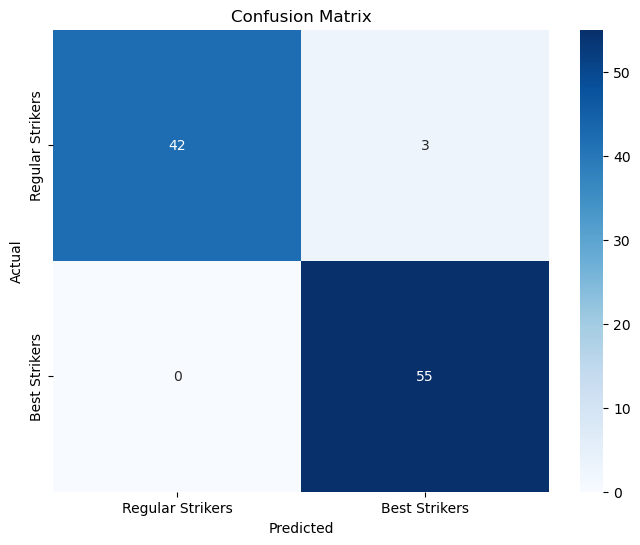

In [78]:
# Create the confusion matrix and visualize it.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Regular Strikers', 'Best Strikers'], yticklabels=['Regular Strikers', 'Best Strikers'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Here the confusion matrix shows the model accuracy with a score of 97/100, that the True Positive comes out to 55, which means the model correctly identified the 55 Best strikers from the data.

#### A confusion Matrix works as: 
                                    [True Neg, False Pos
                                    False Neg, True Pos]
                                    
#### That comes out to: 
                    [Correctly Identified as Regular Strikers: 42, Incorrectly identified as Best Strikers: 3
                    Incorrectly identified as Regular Strikers: 0, Correctly Identified as Best Strikers: 42]